In [1]:
import os
meteoPoints = {}
with os.scandir('data/') as entries:
    for entry in entries:
        meteoPoints[entry.name] = []
        dataFile = open('data/'+entry.name, 'r')
        points = dataFile.readlines()
        for line in points:
            tempData = line.split()
            if tempData[4] != "-99.9" and tempData[5] != "-99.9":
                tempArray = {}
                tempArray['year'] = int(tempData[0])
                tempArray['month'] = int(tempData[1])
                tempArray['day'] = int(tempData[2])
                tempArray['max'] = float(tempData[4])
                tempArray['min'] = float(tempData[5])
                meteoPoints[entry.name].append(tempArray)
print(meteoPoints)

.4}, {'year': 2012, 'month': 11, 'day': 10, 'max': 20.0, 'min': 8.6}, {'year': 2012, 'month': 11, 'day': 11, 'max': 20.8, 'min': 9.4}, {'year': 2012, 'month': 11, 'day': 12, 'max': 21.0, 'min': 10.2}, {'year': 2012, 'month': 11, 'day': 13, 'max': 21.8, 'min': 10.6}, {'year': 2012, 'month': 11, 'day': 14, 'max': 21.6, 'min': 10.4}, {'year': 2012, 'month': 11, 'day': 15, 'max': 21.8, 'min': 9.4}, {'year': 2012, 'month': 11, 'day': 16, 'max': 21.6, 'min': 9.0}, {'year': 2012, 'month': 11, 'day': 17, 'max': 20.8, 'min': 8.2}, {'year': 2012, 'month': 11, 'day': 18, 'max': 18.4, 'min': 8.2}, {'year': 2012, 'month': 11, 'day': 19, 'max': 19.2, 'min': 8.8}, {'year': 2012, 'month': 11, 'day': 20, 'max': 19.4, 'min': 7.2}, {'year': 2012, 'month': 11, 'day': 21, 'max': 19.8, 'min': 10.0}, {'year': 2012, 'month': 11, 'day': 22, 'max': 20.0, 'min': 7.8}, {'year': 2012, 'month': 11, 'day': 23, 'max': 20.6, 'min': 7.6}, {'year': 2012, 'month': 11, 'day': 24, 'max': 20.8, 'min': 7.8}, {'year': 2012, '

2003 4.0648351648351655 20.093956043956037
2004 5.139890710382517 19.592349726775943
2005 4.9882191780822 19.52273972602739
2006 5.221643835616439 19.30301369863013
2007 5.565479452054802 19.804383561643846
2008 4.775956284153006 19.112568306010942
2009 4.990136986301369 19.60876712328769
2010 5.247671232876708 20.0219178082192
2011 5.078356164383556 19.666301369863024
2012 4.946994535519121 19.48688524590166
2013 4.855890410958898 19.59534246575344
2014 5.596666666666666 18.97499999999999


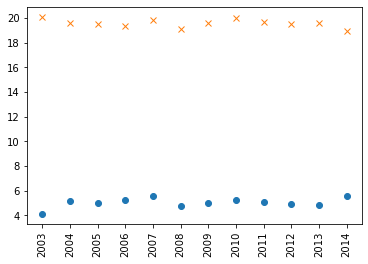

In [2]:
# Visualizacion por year segun archivo
import matplotlib.pyplot as plt

fileName = 'Ayahuasi_Arequipa.txt'
mapYear = {}

for point in meteoPoints[fileName]:
    if str(point['year']) in mapYear:
        mapYear[str(point['year'])]['valueMin'] = mapYear[str(point['year'])]['valueMin'] + point['min']
        mapYear[str(point['year'])]['valueMax'] = mapYear[str(point['year'])]['valueMax'] + point['max']
        mapYear[str(point['year'])]['count'] = mapYear[str(point['year'])]['count'] + 1
    else:
        mapYear[str(point['year'])] = {}
        mapYear[str(point['year'])]['valueMin'] = point['min']
        mapYear[str(point['year'])]['valueMax'] = point['max']
        mapYear[str(point['year'])]['count'] = 1

years = []
valuesMin = []
valuesMax = []

for key in mapYear:
    years.append(key)
    valuesMin.append(mapYear[key]['valueMin'] / mapYear[key]['count'])
    valuesMax.append(mapYear[key]['valueMax'] / mapYear[key]['count'])
    print(key, mapYear[key]['valueMin'] / mapYear[key]['count'], mapYear[key]['valueMax'] / mapYear[key]['count'])

plt.plot(years, valuesMin, 'o')
plt.plot(years, valuesMax, 'x')
plt.xticks(rotation=90)
plt.draw()

{'1': {'valueMin': 196.99999999999997, 'valueMax': 586.2, 'count': 31}, '2': {'valueMin': 182.79999999999998, 'valueMax': 479.8, 'count': 28}, '3': {'valueMin': 195.2, 'valueMax': 549.6, 'count': 31}, '4': {'valueMin': 156.79999999999998, 'valueMax': 598.2, 'count': 30}, '5': {'valueMin': 133.79999999999998, 'valueMax': 618.4, 'count': 31}, '6': {'valueMin': 85.0, 'valueMax': 597.8000000000001, 'count': 30}, '7': {'valueMin': 101.39999999999999, 'valueMax': 608.9999999999999, 'count': 31}, '8': {'valueMin': 89.40000000000002, 'valueMax': 627.2, 'count': 31}, '9': {'valueMin': 158.20000000000002, 'valueMax': 596.1999999999999, 'count': 30}, '10': {'valueMin': 177.80000000000004, 'valueMax': 651.2, 'count': 31}, '11': {'valueMin': 182.00000000000006, 'valueMax': 611.1999999999999, 'count': 30}, '12': {'valueMin': 162.0, 'valueMax': 632.3999999999999, 'count': 31}}
1 6.354838709677418 18.90967741935484
2 6.528571428571428 17.135714285714286
3 6.296774193548386 17.729032258064517
4 5.22666

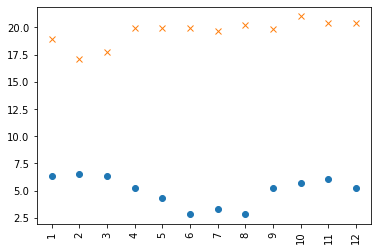

In [3]:
# Visualizacion por month segun archivo
import matplotlib.pyplot as plt

year = 2009
mapMonth = {}

for point in meteoPoints[fileName]:
    if point['year'] != year:
        continue
    if str(point['month']) in mapMonth:
        mapMonth[str(point['month'])]['valueMin'] = mapMonth[str(point['month'])]['valueMin'] + point['min']
        mapMonth[str(point['month'])]['valueMax'] = mapMonth[str(point['month'])]['valueMax'] + point['max']
        mapMonth[str(point['month'])]['count'] = mapMonth[str(point['month'])]['count'] + 1
    else:
        mapMonth[str(point['month'])] = {}
        mapMonth[str(point['month'])]['valueMin'] = point['min']
        mapMonth[str(point['month'])]['valueMax'] = point['max']
        mapMonth[str(point['month'])]['count'] = 1

print(mapMonth)

months = []
valuesMin = []
valuesMax = []

for key in mapMonth:
    months.append(key)
    valuesMin.append(mapMonth[key]['valueMin'] / mapMonth[key]['count'])
    valuesMax.append(mapMonth[key]['valueMax'] / mapMonth[key]['count'])
    print(key, mapMonth[key]['valueMin'] / mapMonth[key]['count'], mapMonth[key]['valueMax'] / mapMonth[key]['count'])

plt.plot(months, valuesMin, 'o')
plt.plot(months, valuesMax, 'x')
plt.xticks(rotation=90)
plt.draw()

{'1': {'valueMin': 2.4, 'valueMax': 20.0, 'count': 1}, '2': {'valueMin': 2.0, 'valueMax': 21.0, 'count': 1}, '3': {'valueMin': 2.8, 'valueMax': 20.6, 'count': 1}, '4': {'valueMin': 4.0, 'valueMax': 20.2, 'count': 1}, '5': {'valueMin': 3.6, 'valueMax': 20.0, 'count': 1}, '6': {'valueMin': 3.2, 'valueMax': 20.2, 'count': 1}, '7': {'valueMin': 3.8, 'valueMax': 19.4, 'count': 1}, '8': {'valueMin': 3.0, 'valueMax': 20.0, 'count': 1}, '9': {'valueMin': 3.4, 'valueMax': 21.0, 'count': 1}, '10': {'valueMin': 2.4, 'valueMax': 19.8, 'count': 1}, '11': {'valueMin': 2.2, 'valueMax': 19.0, 'count': 1}, '12': {'valueMin': 3.4, 'valueMax': 20.0, 'count': 1}, '13': {'valueMin': 3.8, 'valueMax': 19.6, 'count': 1}, '14': {'valueMin': 3.6, 'valueMax': 19.8, 'count': 1}, '15': {'valueMin': 2.6, 'valueMax': 20.4, 'count': 1}, '16': {'valueMin': 2.0, 'valueMax': 18.6, 'count': 1}, '17': {'valueMin': 2.8, 'valueMax': 18.8, 'count': 1}, '18': {'valueMin': 2.4, 'valueMax': 19.0, 'count': 1}, '19': {'valueMin':

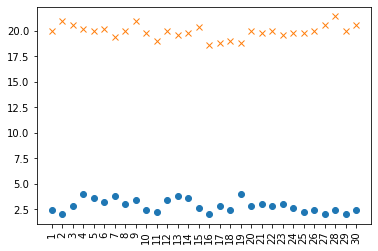

In [4]:
# Visualizacion por day segun archivo
import matplotlib.pyplot as plt

month = 6
mapDay = {}

for point in meteoPoints[fileName]:
    if point['year'] != year or point['month'] != month:
        continue
    if str(point['day']) in mapDay:
        mapDay[str(point['day'])]['valueMin'] = mapDay[str(point['day'])]['valueMin'] + point['min']
        mapDay[str(point['day'])]['valueMax'] = mapDay[str(point['day'])]['valueMax'] + point['max']
        mapDay[str(point['day'])]['count'] = mapDay[str(point['day'])]['count'] + 1
    else:
        mapDay[str(point['day'])] = {}
        mapDay[str(point['day'])]['valueMin'] = point['min']
        mapDay[str(point['day'])]['valueMax'] = point['max']
        mapDay[str(point['day'])]['count'] = 1

print(mapDay)

days = []
valuesMin = []
valuesMax = []

for key in mapDay:
    days.append(key)
    valuesMin.append(mapDay[key]['valueMin'] / mapDay[key]['count'])
    valuesMax.append(mapDay[key]['valueMax'] / mapDay[key]['count'])
    print(key, mapDay[key]['valueMin'] / mapDay[key]['count'], mapDay[key]['valueMax'] / mapDay[key]['count'])

plt.plot(days, valuesMin, 'o')
plt.plot(days, valuesMax, 'x')
plt.xticks(rotation=90)
plt.draw()

In [70]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

temp = meteoPoints["Imata_Arequipa.txt"]

data = []

for point in temp:
    d = datetime.date(point['year'], point['month'], point['day'])
    data.append([d, point['max'], point['min']])

temp_df = pd.DataFrame(data, columns=['datetime', 'max', 'min'])

#Reducir los datos a todos los mayores a 2010
#mask = (temp_df['datetime'] >= datetime.date(2010, 1, 1))
#temp_df = temp_df.loc[mask]

temp_df.set_index('datetime', inplace=True)
temp_df.head(10)


max  min
datetime             
1962-01-01  13.0  0.0
1962-01-02  13.0 -3.8
1962-01-03  14.0 -1.5
1962-01-04  10.2  1.6
1962-01-05  12.4 -2.2
1962-01-06  12.0 -1.0
1962-01-07  11.5  0.6
1962-01-08  12.2  0.8
1962-01-09   9.8  1.8
1962-01-10  10.5 -2.0

In [6]:

from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))
temp_df.describe()


max  min
datetime             
1962-01-01  13.0  0.0
1962-01-02  13.0 -3.8
1962-01-03  14.0 -1.5
1962-01-04  10.2  1.6
1962-01-05  12.4 -2.2

max  min
datetime             
2015-10-27  11.8 -2.2
2015-10-28  10.8 -2.6
2015-10-29  12.8 -2.0
2015-10-30  14.6 -5.4
2015-10-31  15.0  7.0

max           min
count  19336.000000  19336.000000
mean      12.478766     -6.639815
std        2.253515      5.211339
min        1.600000    -23.000000
25%       11.000000    -11.000000
50%       12.400000     -6.500000
75%       14.000000     -1.900000
max       19.500000      7.000000

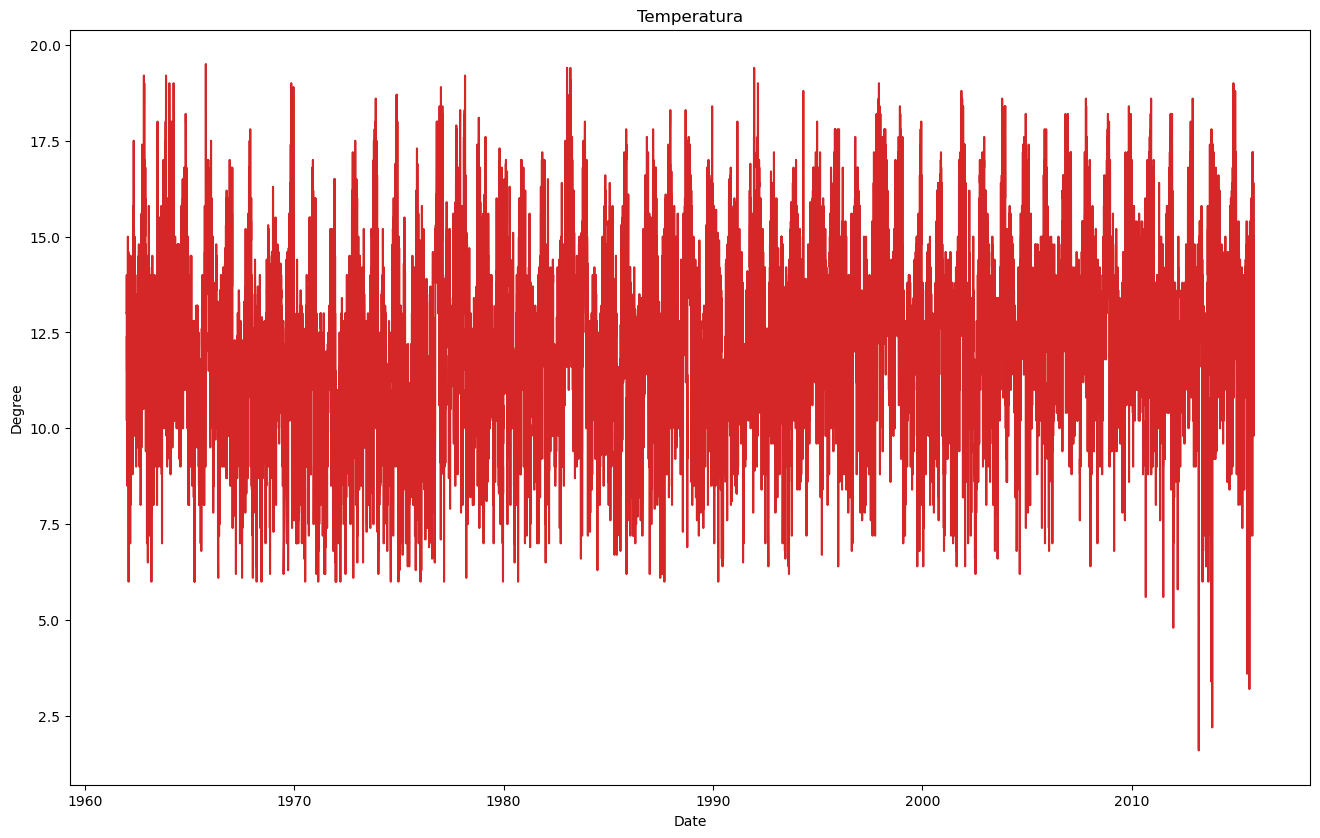

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize= (16,10), dpi= 100)
plt.plot(temp_df.index, temp_df['max'], color= 'tab:red')
plt.gca().set(title= "Temperatura", xlabel="Date", ylabel= "Degree")
plt.show()

<AxesSubplot:xlabel='datetime'>

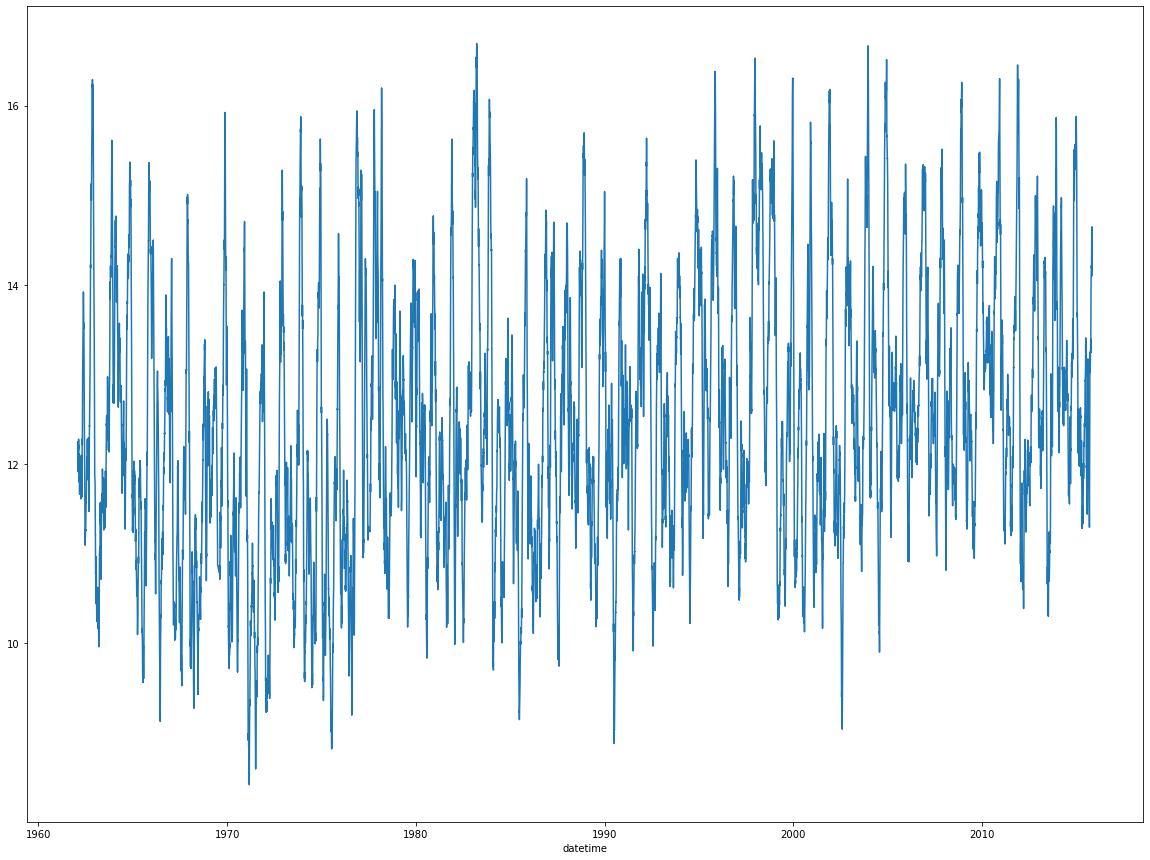

In [8]:
temp_df_mean = temp_df['max'].rolling(window= 30).mean()
temp_df_mean.plot(figsize= (20,15))

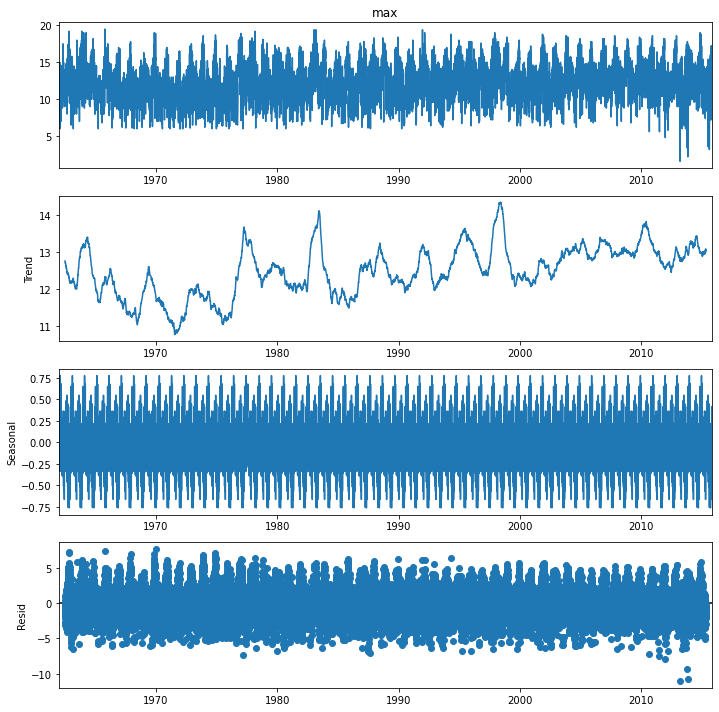

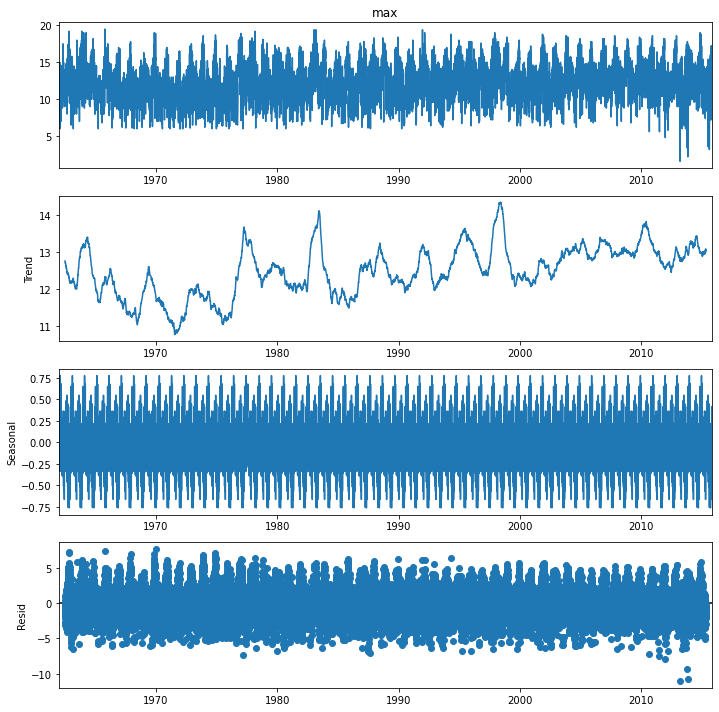

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(temp_df["max"], model= 'additive', extrapolate_trend='freq')

trend = result_add.trend

result_add.plot()